In [2]:
import os
import sys
import pandas as pd
import numpy as np
from copy import copy
import warnings
import importlib
from IPython.core.interactiveshell import InteractiveShell
# from matplotlib import rcParams

# rcParams.update({
#     "text.usetex": True,                
#     "font.family": "serif",            
#     "font.serif": ["Computer Modern"], 
#     "axes.labelsize": 20,              
#     "xtick.labelsize": 20,             
#     "ytick.labelsize": 20,             
#     "legend.fontsize": 20,            
#     "figure.titlesize": 0,             
#     "axes.titlesize": 0,              
# })
notebook_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    
utils_path = os.path.join(project_root, "utils")
if utils_path not in sys.path:
    sys.path.append(utils_path)

    
import get_data

In [5]:
combined_df, patientIds = get_data.get_dataset()
#SAVE DATAFRAME
DATA_PATH = get_data.get_dataset_abspath()
save_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
combined_df.to_parquet(save_path, compression="snappy")

Processing training_setA:   0%|          | 0/20336 [00:00<?, ?it/s]

Processing training_setB:   0%|          | 0/20000 [00:00<?, ?it/s]

In [6]:
#ACCESS DATAFRAME
DATA_PATH = get_data.get_dataset_abspath()
load_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
combined_df = pd.read_parquet(load_path)


Replacement statistics (percentages):
Column: HR
  Method: linear
  Initial missing: 153399
  Linear fill: 100.00%
Column: O2Sat
  Method: linear
  Initial missing: 202736
  Linear fill: 100.00%
Column: SBP
  Method: linear
  Initial missing: 226265
  Linear fill: 100.00%
Column: MAP
  Method: linear
  Initial missing: 193270
  Linear fill: 100.00%
Column: Resp
  Method: linear
  Initial missing: 238335
  Linear fill: 100.00%
Column: Temp
  Method: cluster
  Initial missing: 1026984
  Cluster-mean fill: 100.00%
  Nearest cluster-mean fill: 0.00%
Column: DBP
  Method: cluster
  Initial missing: 486554
  Cluster-mean fill: 100.00%
  Nearest cluster-mean fill: 0.00%
Column: EtCO2
  Method: cluster
  Initial missing: 1494574
  Cluster-mean fill: 99.37%
  Nearest cluster-mean fill: 0.63%
Column: BaseExcess
  Method: cluster
  Initial missing: 1468065
  Cluster-mean fill: 99.90%
  Nearest cluster-mean fill: 0.10%
Column: HCO3
  Method: cluster
  Initial missing: 1487182
  Cluster-mean fill:

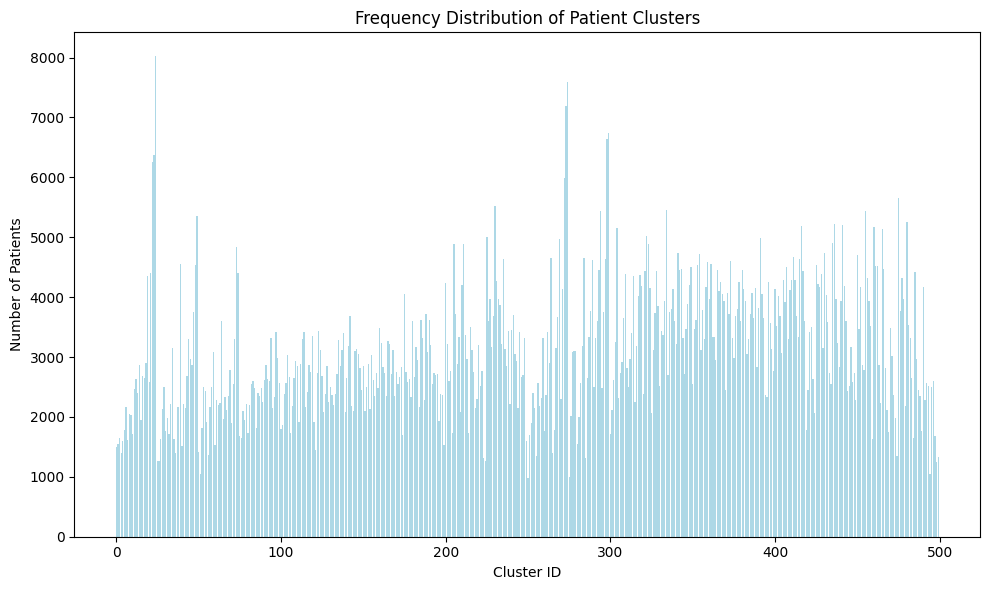

ValueError: 'facecolor' or 'color' argument must be a valid color orsequence of colors.

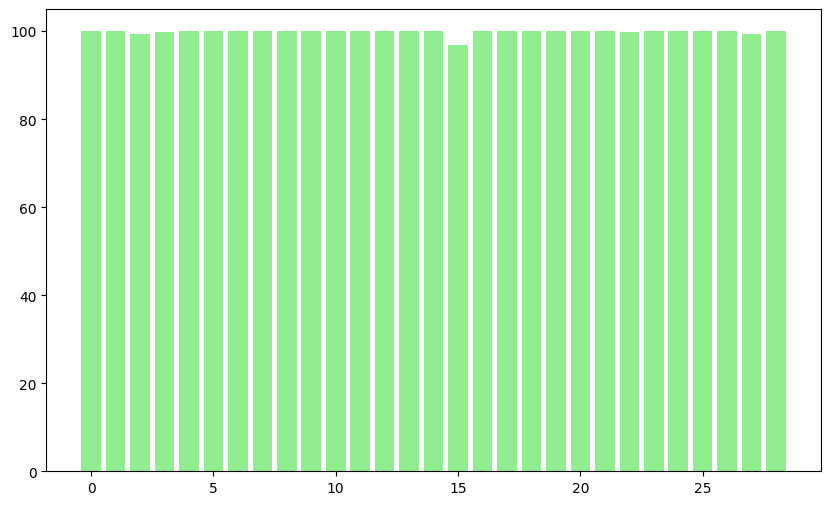

In [7]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import impute_data
importlib.reload(impute_data)

# Choose dataset mode: 1 = full, 2 = first 1000 patients
DATASET_MODE = 1
df_to_impute = (combined_df[combined_df["patient_id"] <= 500].copy() 
                if DATASET_MODE == 2 else combined_df.copy())

# Perform imputation with chosen binning options
df_imputed, replacement_stats = impute_data.impute_df_no_nans(
    df_to_impute,
    nan_density=0.3,   # <-- You can keep or adjust these parameters

    gender_bins=2,
    age_bins=10,
    hr_bins=5,
    map_bins=5,

)

# Check for any remaining missing values
if df_imputed.isna().sum().sum() == 0:
    print("No NaNs found in the imputed data")

# --- Helper Functions ---

def print_replacement_stats(stats: dict) -> None:
    """Prints formatted replacement statistics."""
    print("\nReplacement statistics (percentages):")
    label_map = {
        "Linear fill": "Linear fill",
        "Cluster fill": "Cluster-mean fill",
        "Nearest cluster fill": "Nearest cluster-mean fill",
        "Initial missing": "Initial missing"
    }
    for col, col_stats in stats.items():
        print(f"Column: {col}")
        for key, value in col_stats.items():
            key_print = label_map.get(key, key.capitalize())
            if isinstance(value, (int, float)):
                print(f"  {key_print}: {value:.2f}%")
            else:
                print(f"  {key_print}: {value}")


# --- Execution ---

print_replacement_stats(replacement_stats)
impute_data.plot_cluster_distribution(df_imputed)
impute_data.plot_cluster_fill(replacement_stats)






